In [187]:
import numpy as np
import rasterio as rio
sys.path.append('/Users/zachkeskinen/Documents/uavsar_snow/geolocate')
from geolocate import geolocate_uavsar
import matplotlib.pyplot as plt

## Geolocate LKV and DEM

In [188]:
lkv_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.lkv'
llh_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.llh'
out_dir = '/Users/zachkeskinen/Documents/uavsar_snow/incidence_angle/data'
ann_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann'

geolocate_uavsar(in_fp = lkv_fp, out_dir = out_dir, ann_fp= ann_fp, llh_fp=llh_fp)

## Calculate Gradient

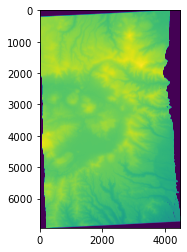

In [189]:
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/incidence_angle/geolocated_dem_lkv/llh.dem.tif') as src:
    arr = src.read(1)
plt.imshow(arr)

In [224]:
dx, dy = np.gradient(arr, 5, 5)

In [227]:
lkv = {}
for direction in ['x','y','z']:
    with rio.open(f'/Users/zachkeskinen/Documents/uavsar_snow/incidence_angle/geolocated_dem_lkv/lkv.{direction}.tif') as src:
        lkv[direction] = src.read(1)

In [228]:
mag = np.zeros_like(lkv['x'])
for direction, arr in lkv.items():
    mag = mag + arr**2
mag = mag**0.5
mag[mag == 0] = mag[mag == 0] + 0.0001

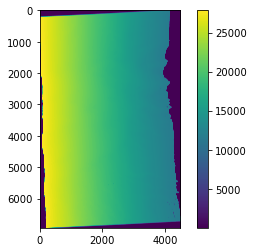

In [229]:
plt.imshow(mag)
plt.colorbar()

In [247]:
new_lkv = {}
for direction, arr in lkv.items():
    new_lkv[direction] = arr
    new_lkv[f'{direction}_unit'] = -arr/mag

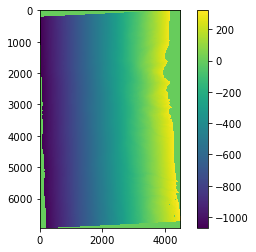

In [248]:
plt.imshow(new_lkv['x'], interpolation='nearest')
plt.colorbar()

In [ ]:
g = np.where(t>=1, t - 1, t)
h = np.arccos(g)
h = np.where(t>=1, np.deg2rad(180 - np.rad2deg(np.arccos(1.115492 - 1))), g)
plt.imshow(np.rad2deg(h))
plt.colorbar()

In [344]:
inc_cos = new_lkv['x_unit']*dx + new_lkv['y_unit']*dy + new_lkv['z_unit']

inc_cos_shifted = np.where(inc_cos>=1, inc_cos - 1, inc_cos)
cos_shifted = np.arccos(inc_cos_shifted)
h = np.where(inc_cos>=1, np.deg2rad(np.pi - np.arccos(inc_cos_shifted - 1)), cos_shifted)

# inc = np.arccos(inc_cos)

/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """


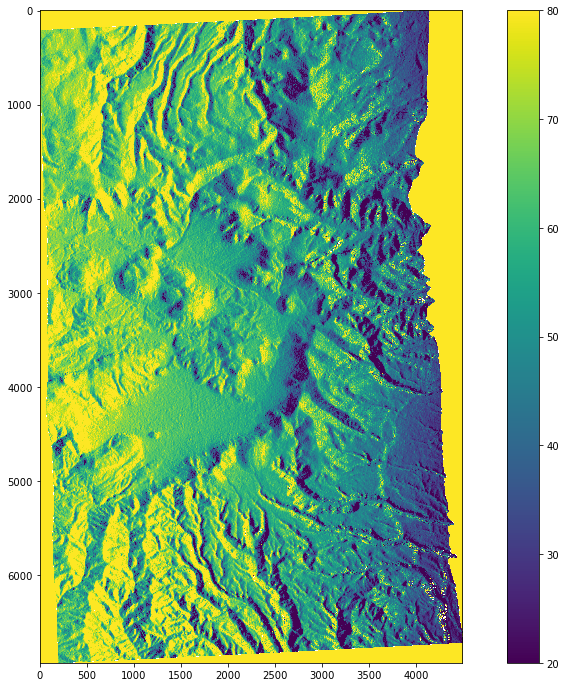

In [345]:
plt.subplots(figsize = (16,12))
plt.imshow(np.rad2deg(h),vmin = 20, vmax = 80,interpolation='nearest')
plt.colorbar()

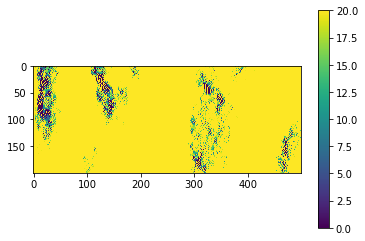

In [310]:
t = inc_cos[2000:2200,3000:3500]
plt.imshow(np.rad2deg(t), vmin = 0, vmax = 20, interpolation='nearest')
plt.colorbar()

In [313]:
print(t)

[[0.73057127 0.7003699  0.68979955 ... 0.83924246 0.83148384 0.7921126 ]
 [0.6242373  0.6585389  0.6668186  ... 0.7996834  0.7909186  0.78250176]
 [0.7132253  0.7132698  0.7124731  ... 0.9337659  0.84443074 0.8093144 ]
 ...
 [0.7830643  0.7409526  0.79647183 ... 1.115492   1.095878   1.0794989 ]
 [0.77824533 0.73766786 0.7947229  ... 1.1148709  1.10495    1.0237268 ]
 [0.7682642  0.7310127  0.7875546  ... 1.0702727  1.0944142  1.1822662 ]]


In [403]:
v = 1.01
np.arccos(2-v)

0.1415394733244273

In [402]:
np.arccos(0.01)

1.5607961601207294

In [434]:
def arccos_theta(v):
    if v < 1 and v > -1:
        return np.arccos(v)
    elif v > 1 and v < 3:
        return np.arccos(2-v)
    elif v < -1 and v > -3:
        return np.arccos(-1 + 0.000001) - np.arccos(2+v)
arccos_theta = np.vectorize(arccos_theta)

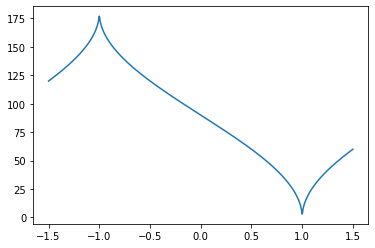

In [431]:
x = np.linspace(-1.5, 1.5, 1000)
y = v_arccos(x)
plt.plot(x,np.rad2deg(y))

In [393]:
np.arccos(0.999)

0.04472508716873345

/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


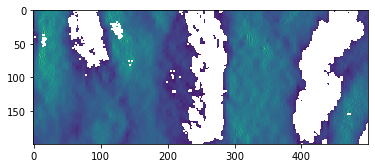

In [308]:
theta = np.arccos(t)
plt.imshow(theta)

In [377]:
180 - np.rad2deg(np.arccos(-1.1+2))

154.15806723683286

In [379]:
np.rad2deg(np.arccos(0.9))

25.841932763167126

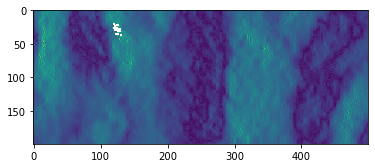

In [433]:
plt.imshow(v_arccos(t))

/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


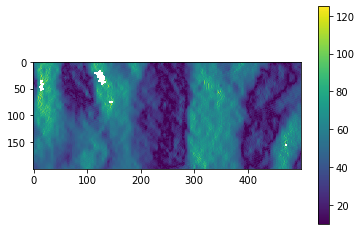

In [374]:
t = inc_cos[2000:2200,3000:3500]
g = t
h = np.where(t>=1, np.deg2rad(180 - np.rad2deg(np.arccos(g - 2))), np.arccos(g))
h = np.where(t<=-1, np.deg2rad(180 - np.rad2deg(np.arccos(g - 2))), np.arccos(g))
#h = np.where(t>=1, np.deg2rad(np.pi - (np.arccos(g - 1))), np.arccos(g))
plt.imshow(np.abs(np.rad2deg(h)), vmin = 10, vmax = 125)
plt.colorbar()

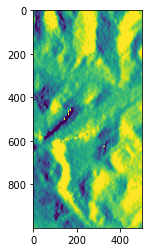

In [271]:
plt.imshow(t, vmin = 0, vmax = 1)